In [1]:
import os
import sys
import time
import argparse
import cv2 
import numpy as np
import math
import matplotlib

from moviepy.video.io.VideoFileClip import VideoFileClip
from matplotlib import pyplot as plt



In [2]:
PROJECT_DIR = os.getcwd()
IMAGES_DIR = os.path.join(PROJECT_DIR, 'images')
OTHER_DIR = os.path.join(PROJECT_DIR, 'other_source_data')
PYTHON_DIR = os.path.join(PROJECT_DIR, 'python_files')
SOURCE_VIDEO_DIR = os.path.join(PROJECT_DIR, 'source_videos')
SAVED_MEDIA = os.path.join(PROJECT_DIR, 'saved_media')

let try to work through this 
https://medium.com/analytics-vidhya/image-convolution-from-scratch-d99bf639c32a




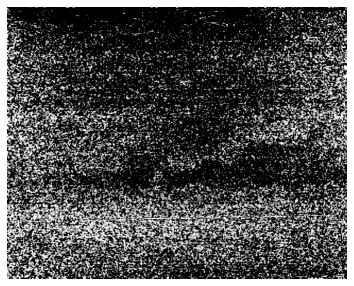

In [45]:
name = os.path.join(IMAGES_DIR, 'DroneS1-00797.png')
src = cv2.imread(name)
img_origin = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(img_origin)

In [46]:
img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
name = os.path.join(IMAGES_DIR, 'DroneS1-00797_grey.png')
plt.imsave(name, img, cmap='gray')
gsrc = cv2.imread(name, 0)
img_mat = []
for i in range(0, gsrc.shape[0]):
    row = []
    for j in range(0, gsrc.shape[1]):
        pixel = gsrc.item(i, j)
        row.append(pixel)
    img_mat.append(row)

In [48]:
img_mat = np.array(img_mat)
img_tran_mat = img_mat.T
name = os.path.join(IMAGES_DIR, 'DroneS1-00797_grey.png')
cv2.imwrite(name, img_tran_mat)


print(img_mat)
print(img_mat.shape)


[[  0   0   0 ... 237  68  68]
 [  0   0   0 ... 233  88  88]
 [255  92   0 ... 230 104 104]
 ...
 [255 253 237 ...  36   0   0]
 [255 241 202 ...   0   0   0]
 [255 241 202 ...   0   0   0]]
(512, 640)


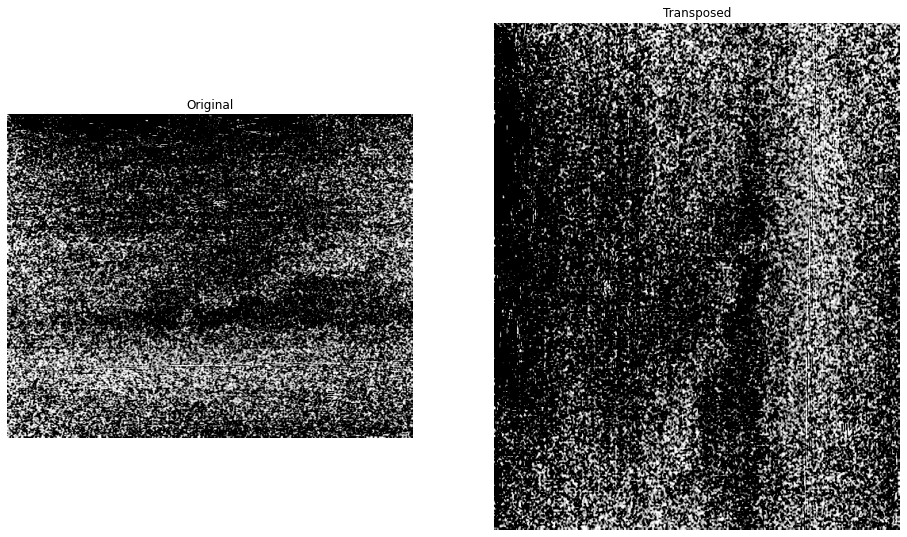

In [49]:
fig = plt.figure(figsize=(16, 25))
name = os.path.join(IMAGES_DIR, 'DroneS1-00797.png')
orig = cv2.imread(name)
name = os.path.join(IMAGES_DIR, 'DroneS1-00797_grey.png')
tran = cv2.imread(name)

ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original')
ax1.imshow(orig)

ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Transposed')
ax2.imshow(tran)

Step 1  Convert the image into grayscale and obtain the matrix.



In [50]:
def convert_image_matrix(img_name):
    src = cv2.imread(img_name)
    img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    name, ext = img_name.split('.')
    target = str(name + '_gray.' + ext)
    plt.imsave(target, img, cmap='gray')
    
    gray_img = cv2.imread(target, 0)
    gimg_shape = gray_img.shape
    gimg_mat = []
    for i in range(0, gimg_shape[0]):
        row = []
        for j in range(0, gimg_shape[1]):
            pixel = gray_img.item(i, j)
            row.append(pixel)
            
        gimg_mat.append(row)
        
    gimg_mat = np.array(gimg_mat)
    return gimg_mat


Step 2

In [26]:
def get_sub_matrices(orig_matrix, kernel_size):
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    if kernel_size[0] == kernel_size[1]:
        if kernel_size[0] > 2:
            orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
        else: pass
    else: pass
    
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    img_sampling = np.array(giant_matrix)
    return img_sampling

Step 3

In [27]:
def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    return transform_mat

Step 4

In [29]:
def original_VS_convoluted(img_name, kernel_name, convoluted_matrix):
    name, ext = img_name.split('.')
    target = str(name + '_gray.' + ext)
    kernel = str(name + '_' + kernel_name + '.' + ext)
    
    cv2.imwrite(kernel, convoluted_matrix)
    orig = cv2.imread(target)
    conv = cv2.imread(kernel)
    
    fig = plt.figure(figsize=(16, 25))
    ax1 = fig.add_subplot(2,2,1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax1.imshow(orig)
    ax2 = fig.add_subplot(2,2,2)
    ax2.axis("off")
    ax2.title.set_text(str(kernel_name).title())
    ax2.imshow(conv)
    return True

C:\Users\admin\workspace\USSOCOM\image-play\images\lena.png


True

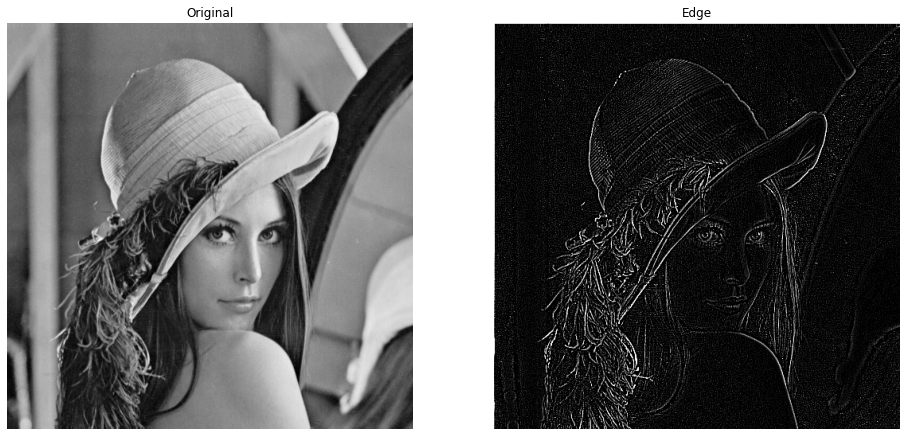

In [53]:

name = os.path.join(IMAGES_DIR, 'lena.png')
print(name)

img_mat = convert_image_matrix(name)
identity_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)

original_VS_convoluted(name,'edge', transform_mat)